
# Линейная регрессия. Практическая работа

## Цель практической работы

Научиться строить модель линейной регрессии на реальных данных.

## Что входит в практическую работу


1. Загрузить данные и ознакомиться с ними.
2. Изучить данные и провести анализ.
3. Разделить данные на обучающую и тестовую выборки.
4. Реализовать построение модели с помощью  библиотеки scikit-learn.
5. Получить качество модели с помощью MSE, MAE.


## Что оценивается 

* Выполнены все этапы работы.
* Сделан вывод по результатам.
* Модель не переобучена.
* Получена модель хорошего качества.

## Как отправить работу на проверку

Скачайте файл с заданиями в материалах, откройте его через Jupyter Notebook и выполните задачи. Сохраните изменения при помощи опции Save and Checkpoint из вкладки меню File или кнопки Save and Checkpoint на панели инструментов. Отправьте через форму ниже итоговый файл Jupyter Notebook (в формате .ipynb) или ссылку на него.



## Что нужно сделать

Пусть у нас имеется некоторый набор данных `sales.csv` о продажах квартир:

- **SalePrice** (цена продажи, *зависимая переменная*).
- **GrLivArea** (наземная жилая зона).
- **OverallQuality** (общее качество).
- **GarageArea** (территория гаража).
- **SaleCondition** (условия сделки).

Реализуйте построение модели линейной регрессии на этих данных. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE. Определите, что вы не переобучились.

### 1. Импорт библиотек

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae


### 2. Загрузка данных

In [161]:
df = pd.read_csv("sales.csv")
df

,SalePrice,GrLivArea,GarageArea,OverallQual,Street,SaleCondition
0,208500,1710,548,7,Pave,Normal
1,181500,1262,460,6,Pave,Normal
2,223500,1786,608,7,Pave,Normal
3,140000,1717,642,7,Pave,Abnorml
4,250000,2198,836,8,Pave,Normal
...,...,...,...,...,...,...
1455,175000,1647,460,6,Pave,Normal
1456,210000,2073,500,6,Pave,Normal
1457,266500,2340,252,7,Pave,Normal
1458,142125,1078,240,5,Pave,Normal


### 3. Первичный анализ

1. Проведите анализ данных, посмотрите на индивидуальные графики зависимости целевой функции и отдельной переменной. Нередко, если признаков в выборке не так много, удобно построить [sns.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html).
2. Закодируйте категориальные признаки (например, с помощью [pd.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)).
3. Подумайте, можно ли здесь создать дополнительные переменные из имеющихся.
4. Сделайте предварительные выводы.

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SalePrice      1460 non-null   int64 
 1   GrLivArea      1460 non-null   int64 
 2   GarageArea     1460 non-null   int64 
 3   OverallQual    1460 non-null   int64 
 4   Street         1460 non-null   object
 5   SaleCondition  1460 non-null   object
dtypes: int64(4), object(2)
memory usage: 68.6+ KB


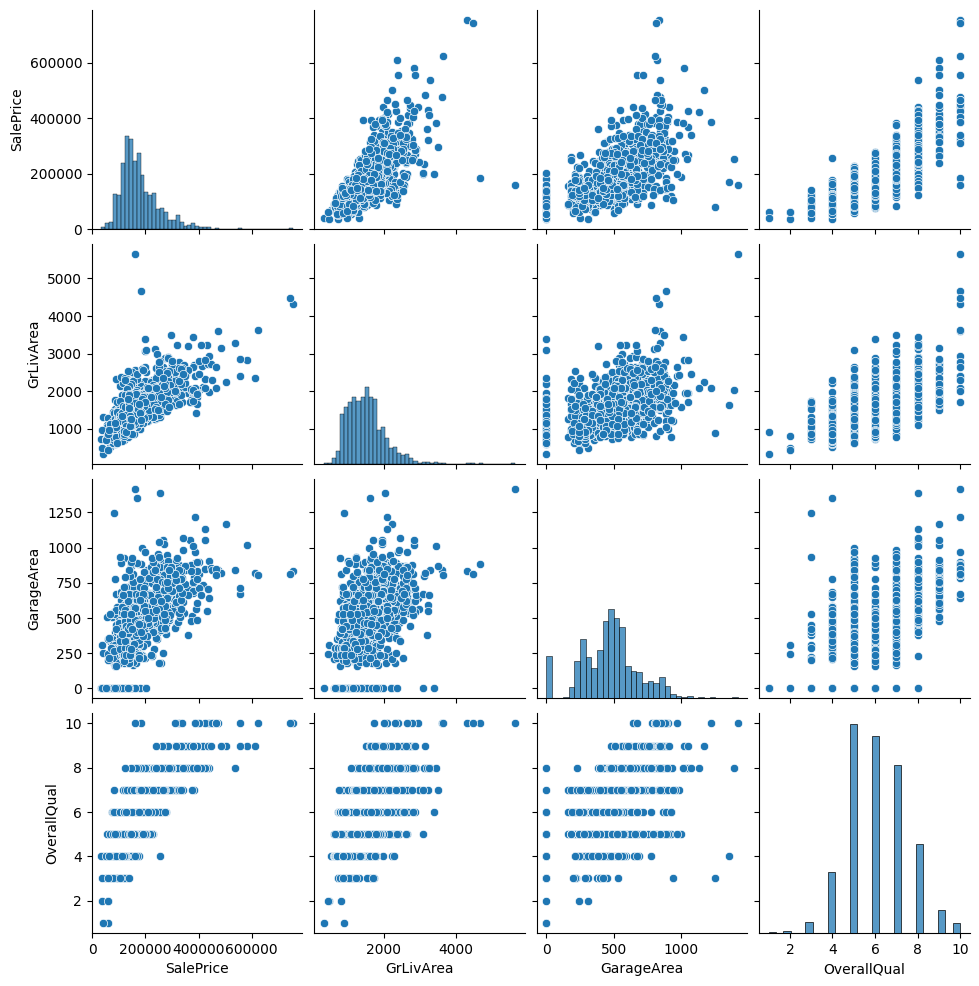

In [163]:
sns.pairplot(df)

In [164]:
df.Street.replace("Pave", 1, inplace=True)
df.Street.replace("Grvl", 2, inplace=True)

df.Street

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8636\429045912.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Street.replace("Pave", 1, inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8636\429045912.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

0       1
1       1
2       1
3       1
4       1
       ..
1455    1
1456    1
1457    1
1458    1
1459    1
Name: Street, Length: 1460, dtype: int64

In [165]:
unik = df.SaleCondition.unique()

for i in range(len(unik)):
    df.SaleCondition.replace(unik[i], i, inplace=True)

df.SaleCondition


df.SalePrice = (df.SalePrice - df.SalePrice.min()) / (df.SalePrice.max() - df.SalePrice.min())
df.GrLivArea = (df.GrLivArea - df.GrLivArea.min()) / (df.GrLivArea.max() - df.GrLivArea.min())
df.GarageArea = (df.GarageArea - df.GarageArea.min()) / (df.GarageArea.max() - df.GarageArea.min())

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8636\3408643375.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.SaleCondition.replace(unik[i], i, inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8636\3408643375.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.SaleCondition.replac

In [166]:
df

,SalePrice,GrLivArea,GarageArea,OverallQual,Street,SaleCondition
0,0.241078,0.259231,0.386460,7,1,0
1,0.203583,0.174830,0.324401,6,1,0
2,0.261908,0.273549,0.428773,7,1,0
3,0.145952,0.260550,0.452750,7,1,1
4,0.298709,0.351168,0.589563,8,1,0
...,...,...,...,...,...,...
1455,0.194556,0.247362,0.324401,6,1,0
1456,0.243161,0.327619,0.352609,6,1,0
1457,0.321622,0.377920,0.177715,7,1,0
1458,0.148903,0.140166,0.169252,5,1,0


### 4. Разделение на обучающую и тестовую выборки

In [167]:
y = df[["SalePrice"]]
x = df[["GrLivArea"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)

### 5. Обучение модели линейной регрессии

Дополнительно можно взглянуть на коэффициенты и смещение обученной модели.

In [168]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

### 6. Получение предсказаний для обучающей и тестовой выборок

In [169]:
y_pred = model.predict(x_test)

### 7. Проверка предсказаний

1. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE.
2. Постройте диаграмму рассеяния целевой и предсказанной переменных. 

In [170]:
mse(y_test, y_pred), mae(y_test, y_pred)

(0.006499306410234859, 0.05333574987987544)

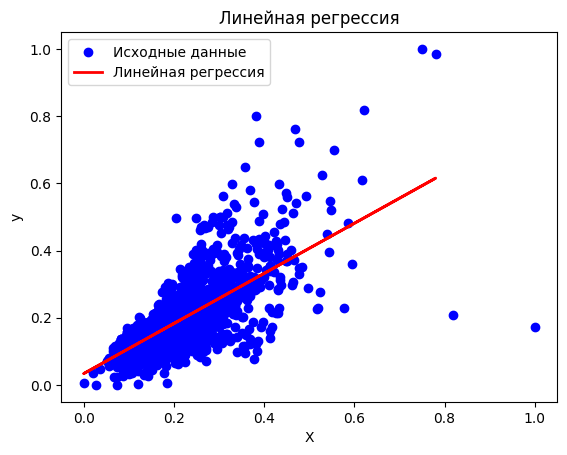

In [171]:
plt.scatter(x, y, color='blue', label='Исходные данные')
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Линейная регрессия')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Линейная регрессия')
plt.legend()
plt.show()

в силу больших разбросов данных линейная регрессия не слишком хорошо предсказывает данные